In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [6]:
df.drop(columns='Unnamed: 0',inplace= True)

In [7]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


## Data Cleaning

In [8]:
# 1) To remove GB from RAM 2) remove kg from weight

df['Ram'] = df['Ram'].apply(lambda x: x.replace("GB",''))
df['Weight'] = df['Weight'].apply(lambda x: x.replace("kg",''))

In [9]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Data Analysis

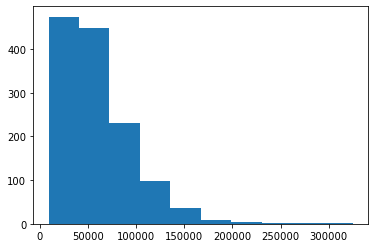

In [11]:
# lets see the distribution of target variable
plt.hist(df['Price'])
plt.show()

# this skewness will cause reduction in performance of the model. So to train the model we have to make it normally distributed
# by log or sqrt technique and when we deploy it we have to take the reverse of log or sqrt to make the price in original form

As it is clear from above graph that target varaible (Price) is skewed towards right. Which shows, there are few laptop's price are very high. And it make sence, some laptops may have very high configurations therefore price will be high.

### Ques1: which company launched max no.of laptop in our dataset?

In [12]:
# number of laptops of top 10 company in our dataset
df['Company'].value_counts()[:10]

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
Samsung      9
Razer        7
Name: Company, dtype: int64

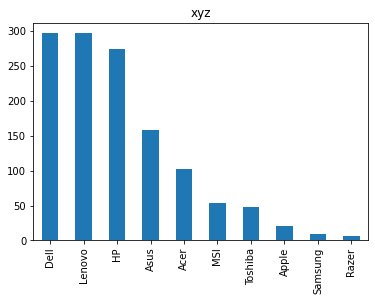

In [13]:
df['Company'].value_counts()[:10].plot(kind = 'bar')
plt.title("xyz")
plt.show()

<AxesSubplot:>

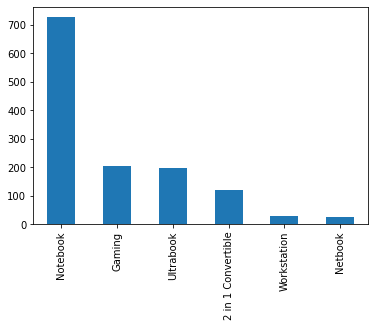

In [14]:
# categories of laptop
df['TypeName'].value_counts().plot(kind = 'bar')

Most commonly used category of laptop is Notebook

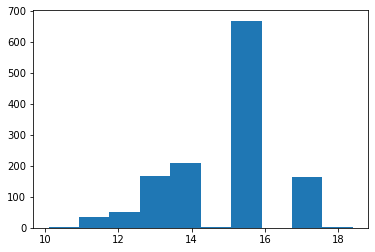

In [15]:
plt.hist(df['Inches'])
plt.show()

In [16]:
import seaborn as sns

C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

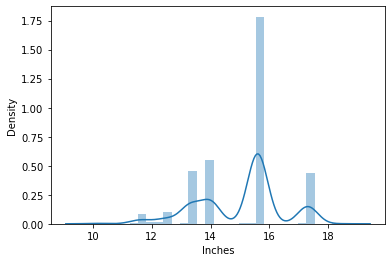

In [17]:
sns.distplot(df['Inches'])

There is a trend at two points 14inch and 15 inch

C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='Price'>

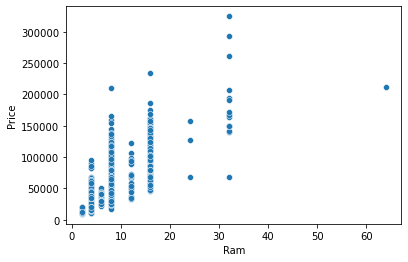

In [18]:
# change in price w.r.to ram
sns.scatterplot(df['Ram'],df['Price'])

Price has very high positive relation with Ram

C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Price'>

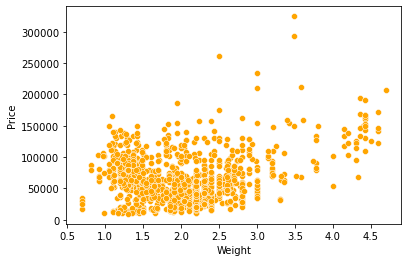

In [19]:
# change in price w.r.to weight
sns.scatterplot(df['Weight'],df['Price'],color = 'orange')

Price has high positive relation with weight

C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

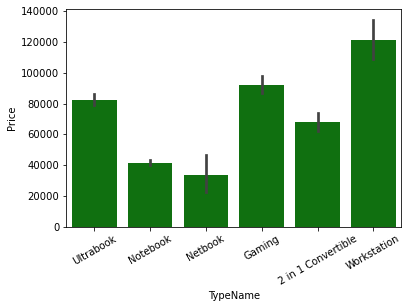

In [20]:
# change in price w.r.to laptop category

sns.barplot(df['TypeName'],df['Price'],color= 'green')
plt.xticks(rotation= 30)

- Workstation is the most expensive category of laptop.
- Gaming and ultrabook laptops come under top 2nd and 3rd expensive laptop's category respectively.
- Notebook and Netbook are the most cheapest/in budget laptop's category
- 2 in 1 convertible catagory laptops come under the middle price range.

## Feature Engineering

In [21]:
# 1) split memory column into SSD,HDD,HYBRID and flash storage
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [22]:
# x = df['Memory'].apply(lambda x : x.replace('\0.1','',regex = True))
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [23]:
df['Memory'] = df['Memory'].apply(lambda x : x.replace('GB','').replace('TB','000'))

In [24]:
df['SSD'] = df['Memory'].apply(lambda x : 1 if 'SSD' in x else 0)

In [25]:
df['HDD'] = df['Memory'].apply(lambda x : 1 if 'HDD' in x else 0)

In [26]:
df['Flash Storage'] = df['Memory'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [27]:
# item = ['+','Hybrid'] 
# df['Hybrid'] = df['Memory'].apply(lambda x : 1 if item in x else 0)

In [28]:
# df['Hybrid'] = df['Memory'].apply(lambda x: 1 if 'Hybrid' or ('+' in x ) else 0)

In [29]:
# df.head(40)

In [30]:
df['hyb'] = df['Memory'].apply(lambda x: 1 if 'Hybrid' in x else 0)

In [31]:
df['plus'] = df['Memory'].apply(lambda x: 1 if '+' in x else 0)

In [32]:
df.head(40)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,hyb,plus
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,0,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,1,0,0,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,0,1,0,0
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1,0,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,1,0,0,0,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,1,0,0,0,0


In [33]:
hybrid = []
for i in range(len(df['Memory'])):
    hybrid.append(df['plus'][i] or df['hyb'][i])


In [34]:
df['Hybrid'] = hybrid

In [35]:
df.head(40)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,hyb,plus,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,0,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,0,0,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,1,0,0,0,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,0,1,0,0,0
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1,0,0,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,1,0,0,0,0,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,1,0,0,0,0,0


In [36]:
df.drop(columns= ['hyb','plus'],inplace=True)

In [37]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1,0


In [38]:
df['roughMemo'] = df['Memory'].apply(lambda x: x.replace('SSD','').replace('HDD','').replace('Hybrid','').replace('+','').replace('Flash Storage',''))

In [39]:
df.head(40)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,roughMemo
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,0,0,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1,0,0,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,0,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,0,0,256
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,1,0,0,500
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,0,1,0,256
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1,0,256
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,1,0,0,0,512
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,1,0,0,0,256


In [40]:
rough = df['roughMemo'].str.split()

In [41]:
len(rough[37])

2

In [42]:
rough[37]

['128', '1000']

In [43]:
for i in rough:
    print(i)

['128']
['128']
['256']
['512']
['256']
['500']
['256']
['256']
['512']
['256']
['500']
['500']
['256']
['256']
['256']
['256']
['256']
['512']
['1000']
['128']
['32']
['128', '1000']
['500']
['256']
['256']
['1000']
['128']
['256']
['256', '256']
['1000']
['64']
['32']
['500']
['512']
['256']
['64']
['1000']
['128', '1000']
['1000']
['256']
['1000']
['256', '1000']
['1000']
['256']
['1000']
['256']
['128']
['256', '1000']
['256']
['1000']
['64']
['256']
['256']
['512']
['1000']
['256']
['128']
['256']
['256', '2000']
['256']
['256', '2000']
['256']
['256']
['256']
['256']
['512']
['500']
['32']
['1000']
['1000']
['128']
['256']
['256']
['128', '1000']
['1000']
['1000']
['2000']
['128', '1000']
['1000']
['128', '1000']
['256']
['512']
['256']
['128']
['1000']
['128', '1000']
['256']
['256']
['128', '1000']
['256']
['1000']
['1000']
['512']
['256']
['256']
['256']
['1000']
['256']
['256']
['128', '1000']
['256']
['500']
['1000']
['256']
['256']
['256']
['1000']
['256']
['256', '1000']
[

In [44]:
for i in range(len(rough)):
    if len(rough[i]) > 1 :
        count = 0
        for j in rough[i]:
            rough[i][count] = int(j)
            count += 1
        rough[i] = sum(rough[i])
    else:
        rough[i] = int(rough[i][0])

In [45]:
for i in rough:
    print(i)

128
128
256
512
256
500
256
256
512
256
500
500
256
256
256
256
256
512
1000
128
32
1128
500
256
256
1000
128
256
512
1000
64
32
500
512
256
64
1000
1128
1000
256
1000
1256
1000
256
1000
256
128
1256
256
1000
64
256
256
512
1000
256
128
256
2256
256
2256
256
256
256
256
512
500
32
1000
1000
128
256
256
1128
1000
1000
2000
1128
1000
1128
256
512
256
128
1000
1128
256
256
1128
256
1000
1000
512
256
256
256
1000
256
256
1128
256
500
1000
256
256
256
1000
256
1256
256
1256
256
256
500
256
256
512
1256
1000
256
1000
2256
256
512
256
500
1000
64
2256
256
1000
1000
256
256
1000
256
1000
1128
1000
256
1000
256
256
500
256
256
512
1000
1256
1000
512
1000
128
1256
256
256
256
256
256
500
1000
256
256
256
1000
1256
1000
1128
256
500
256
2000
500
500
256
1000
128
1512
1128
256
2256
256
512
128
256
512
512
256
256
1128
1000
32
256
256
1000
1000
1000
512
1256
256
1512
128
1000
1512
1256
512
1000
256
256
256
1000
1256
500
256
512
256
1000
256
256
512
256
256
256
1000
1256
256
1000
256
756
1000
1000
5

In [46]:
df['Total_Memory'] = rough

In [47]:
df.head(40)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,roughMemo,Total_Memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,0,0,128,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1,0,128,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1,0,0,0,256,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,0,0,512,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,0,0,256,256
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,1,0,0,500,500
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,0,1,0,256,256
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1,0,256,256
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,1,0,0,0,512,512
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,1,0,0,0,256,256


In [48]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [49]:
# converting Operating system into only 3 categories
def os(ostype):
    if ostype == "Windows 10" or ostype == "Windows 7" or ostype == "Windows 10 S":
        return "Windows"
    elif ostype == "Mac OS X " or ostype == "macOS":
        return "MacOS"
    else :
        return "others/linux/No OS"
    

In [50]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [51]:
df['OpSys'] = df['OpSys'].apply(os)

In [52]:
df['OpSys'].unique()

array(['MacOS', 'others/linux/No OS', 'Windows'], dtype=object)

In [53]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [54]:
# slicing string from I to 13th digit i.e 5 or 7
df['roughCPU'] = df['Cpu'].apply(lambda x: x.strip()[0:13])

In [55]:
# converting processor type into 5 categories:
def cpu(cputype):
    if cputype == "Intel Core i5":
        return "Intel Core i5"
    elif cputype == "Intel Core i7":
        return "Intel Core i7"
    elif cputype == "Intel Core i3":
        return "Intel Core i3"
    elif "Intel" in cputype:
        return "other intel processor"
    else:
        return "AMD"

In [56]:
df['Cpu'] = df['roughCPU'].apply(cpu)

In [57]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [58]:
# remove the last category i.e 'ARM Mali T860 MP4'
df[df['Gpu'] == 'ARM Mali T860 MP4']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,roughMemo,Total_Memory,roughCPU
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,AMD,4,32 Flash Storage,ARM Mali T860 MP4,others/linux/No OS,1.15,35111.52,0,0,1,0,32,32,Samsung Corte


In [59]:
df.drop(1191,inplace= True)

In [60]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 109, dtype: int64

In [61]:
def gpu(gputype):
    if 'Intel' in gputype:
        return 'Intel'
    elif 'Nvidia' in gputype:
        return 'Nvidia'
    else:
        return 'AMD'

In [62]:
df['Gpu'] = df['Gpu'].apply(gpu)

In [63]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [64]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,roughMemo,Total_Memory,roughCPU
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128 SSD,Intel,MacOS,1.37,71378.6832,1,0,0,0,128,128,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128 Flash Storage,Intel,MacOS,1.34,47895.5232,0,0,1,0,128,128,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel,others/linux/No OS,1.86,30636.0000,1,0,0,0,256,256,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512 SSD,AMD,MacOS,1.83,135195.3360,1,0,0,0,512,512,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256 SSD,Intel,MacOS,1.37,96095.8080,1,0,0,0,256,256,Intel Core i5


In [65]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [66]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [67]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS Panel' in x else 0)

In [68]:
df["ScreenResolution"].str.split("x", n = 1, expand = True) 

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [69]:
SresolutinDF = df["ScreenResolution"].str.split("x", n = 1, expand = True) 

In [70]:
df['X_Res'] = SresolutinDF[0].apply(lambda x: x.split()[-1]).astype(int)
df['Y_Res'] = SresolutinDF[1].astype(int)

In [71]:
df.head(30)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,HDD,Flash Storage,Hybrid,roughMemo,Total_Memory,roughCPU,Touchscreen,IPS Panel,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128 SSD,Intel,MacOS,1.37,...,0,0,0,128,128,Intel Core i5,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128 Flash Storage,Intel,MacOS,1.34,...,0,1,0,128,128,Intel Core i5,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel,others/linux/No OS,1.86,...,0,0,0,256,256,Intel Core i5,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512 SSD,AMD,MacOS,1.83,...,0,0,0,512,512,Intel Core i7,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256 SSD,Intel,MacOS,1.37,...,0,0,0,256,256,Intel Core i5,0,1,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD,4,500 HDD,AMD,Windows,2.10,...,1,0,0,500,500,AMD A9-Series,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,256 Flash Storage,Intel,others/linux/No OS,2.04,...,0,1,0,256,256,Intel Core i7,0,1,2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,256 Flash Storage,Intel,MacOS,1.34,...,0,1,0,256,256,Intel Core i5,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7,16,512 SSD,Nvidia,Windows,1.30,...,0,0,0,512,512,Intel Core i7,0,0,1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel,Windows,1.60,...,0,0,0,256,256,Intel Core i5,0,1,1920,1080


In [72]:
df.drop(columns = ['ScreenResolution','roughCPU','Memory','roughMemo'],inplace= True)

In [73]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,Total_Memory,Touchscreen,IPS Panel,X_Res,Y_Res
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,MacOS,1.37,71378.6832,1,0,0,0,128,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,MacOS,1.34,47895.5232,0,0,1,0,128,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5,8,Intel,others/linux/No OS,1.86,30636.0000,1,0,0,0,256,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD,MacOS,1.83,135195.3360,1,0,0,0,512,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,MacOS,1.37,96095.8080,1,0,0,0,256,0,1,2560,1600


In [74]:
df.rename(columns = {'Cpu':'Processor','Total_Memory':'Memory','TypeName':'LaptopType'},inplace= True)

In [75]:
df['Memory'] = df['Memory'].astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   LaptopType     1302 non-null   object 
 2   Inches         1302 non-null   float64
 3   Processor      1302 non-null   object 
 4   Ram            1302 non-null   int32  
 5   Gpu            1302 non-null   object 
 6   OpSys          1302 non-null   object 
 7   Weight         1302 non-null   float32
 8   Price          1302 non-null   float64
 9   SSD            1302 non-null   int64  
 10  HDD            1302 non-null   int64  
 11  Flash Storage  1302 non-null   int64  
 12  Hybrid         1302 non-null   int64  
 13  Memory         1302 non-null   int32  
 14  Touchscreen    1302 non-null   int64  
 15  IPS Panel      1302 non-null   int64  
 16  X_Res          1302 non-null   int32  
 17  Y_Res          1302 non-null   int32  
dtypes: float

In [77]:
df.head(4)

,Company,LaptopType,Inches,Processor,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,Memory,Touchscreen,IPS Panel,X_Res,Y_Res
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,MacOS,1.37,71378.6832,1,0,0,0,128,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,MacOS,1.34,47895.5232,0,0,1,0,128,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5,8,Intel,others/linux/No OS,1.86,30636.0000,1,0,0,0,256,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD,MacOS,1.83,135195.3360,1,0,0,0,512,0,1,2880,1800


In [78]:
#calculate ppi(pixel per inch) price also depends on this so just calculate.
df['ppi'] = ((df['X_Res']**2 + df['Y_Res']**2)**0.5) / df['Inches']

## Data Analysis on new generated features

C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'other intel processor')])

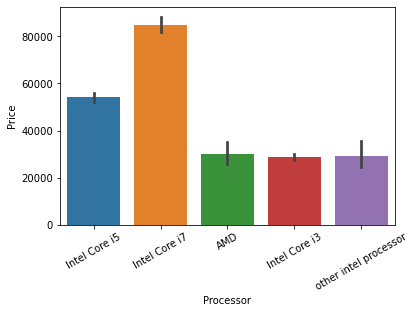

In [79]:
sns.barplot(df['Processor'],df['Price'])
plt.xticks(rotation = 30)

- The price of intel core i7 processors are the highest.
- While the price of AMD, Intel core i3 and other intel processors are almost same.

C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Memory', ylabel='Price'>

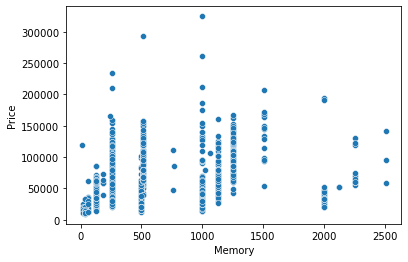

In [80]:
sns.scatterplot(df['Memory'],df['Price'])

<AxesSubplot:>

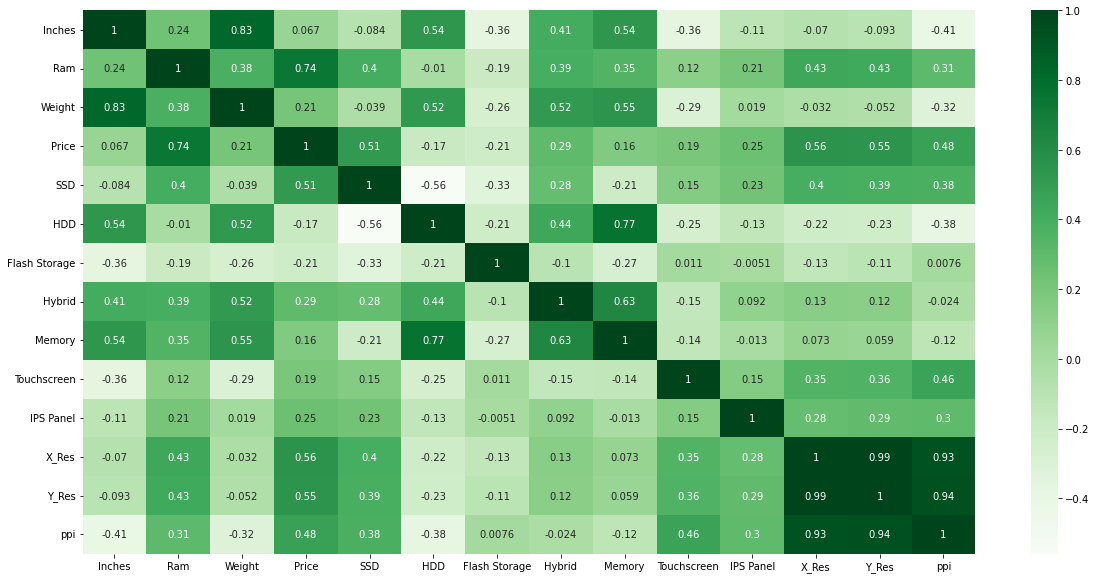

In [81]:
plt.figure(figsize = (20,10))
sns.heatmap(data= df.corr(),annot= True,cmap= 'Greens')

- Flash storage has negative correlation with price so we need to remove it

In [82]:
df.drop(columns = ['Flash Storage','X_Res','Y_Res'],inplace= True)

In [83]:
# coverting skewed distribution into normal distribution
df['Price'] = np.log(df['Price'])

C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

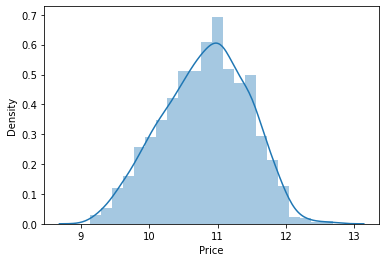

In [84]:
sns.distplot(df['Price'])

## Splitting data into dependent and independent parts

In [85]:
X = df.drop(columns='Price')
Y = df['Price']
X.shape , Y.shape

((1302, 15), (1302,))

In [86]:
X.head(2)

,Company,LaptopType,Inches,Processor,Ram,Gpu,OpSys,Weight,SSD,HDD,Hybrid,Memory,Touchscreen,IPS Panel,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,MacOS,1.37,1,0,0,128,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,MacOS,1.34,0,0,0,128,0,0,127.677940


In [87]:
# feature encoding
# we will use column transformer to transform multiple columns at once
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [89]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size = 0.15)

In [90]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse = False, drop='first'),[0,1,3,5,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
                  ('step1',step1),
                  ('step2',step2)                 
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("r2_score :", r2_score(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))

r2_score : 0.8148342783155862
MSE : 0.06446146567430532


In [91]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse = False, drop='first'),[0,1,3,5,6])
],remainder='passthrough')

step2 = Lasso(alpha=1.0)

pipe = Pipeline([
                  ('step1',step1),
                  ('step2',step2)                 
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("r2_score :", r2_score(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))

r2_score : 0.4360198819412985
MSE : 0.19633755476185305


In [92]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse = False, drop='first'),[0,1,3,5,6])
],remainder='passthrough')

step2 = Ridge(alpha=1.0)

pipe = Pipeline([
                  ('step1',step1),
                  ('step2',step2)                 
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("r2_score :", r2_score(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))

r2_score : 0.8115253838893968
MSE : 0.0656133861406497


In [93]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse = False, drop='first'),[0,1,3,5,6])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
                  ('step1',step1),
                  ('step2',step2)                 
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("r2_score :", r2_score(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))

r2_score : 0.7947876381655224
MSE : 0.07144027251913213


In [105]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse = False, drop='first'),[0,1,3,5,6])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
                  ('step1',step1),
                  ('step2',step2)                 
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

# deme to check ----------------
# y_pred = pipe.predict([['Apple', 'Ultrabook', 13.3, 'Intel Core i5', 8, 'Intel',
#         'others/linux/No OS', 1.3700000047683716, 1, 0, 0, 128, 0, 1,
#         226.98300468106115]])

# print(np.exp(y_pred)[0])
#----------------------------------------------------------------------------------
print("r2_score :", r2_score(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))

65390.71213645135


C:\Users\ASUS VIVOBOOK 14\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [101]:
x_test.shape

(196, 15)

In [107]:
kallu = ['Apple', 'Ultrabook', 13.3, 'Intel Core i5', 8, 'Intel',
        'others/linux/No OS', 1.3700000047683716, 1, 0, 0, 128, 0, 1,
        226.98300468106115]

In [108]:
type(kallu)

list

In [112]:
print(np.array(kallu))

['Apple' 'Ultrabook' '13.3' 'Intel Core i5' '8' 'Intel'
 'others/linux/No OS' '1.3700000047683716' '1' '0' '0' '128' '0' '1'
 '226.98300468106115']


## creating pickle file

In [95]:
import pickle

In [96]:
pickle.dump(pipe,open("model.pkl",'wb'))
pickle.dump(df,open("df.pkl",'wb'))

In [97]:
## pycharm version during model deployment
# PyCharm 2023.1.1 

In [98]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

In [99]:
# model1 = LinearRegression()
# model2 = Lasso(alpha=1.0)
# model3 = Ridge(alpha=1.0)
# model4 = DecisionTreeRegressor(random_state= None)
# model5 = RandomForestRegressor()

In [100]:
# models = {
#             'model1' : LinearRegression(),
#             'model2' : Lasso(alpha=1.0),
#             'model3' : Ridge(alpha=1.0),
#             'model4' : DecisionTreeRegressor(random_state= None),
#             'model5' : RandomForestRegressor()   
# }